In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(irisDF.iloc[:,:-1])

pca = PCA(n_components = 2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)


In [4]:
pca_columns = ['PC1', 'PC2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [5]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


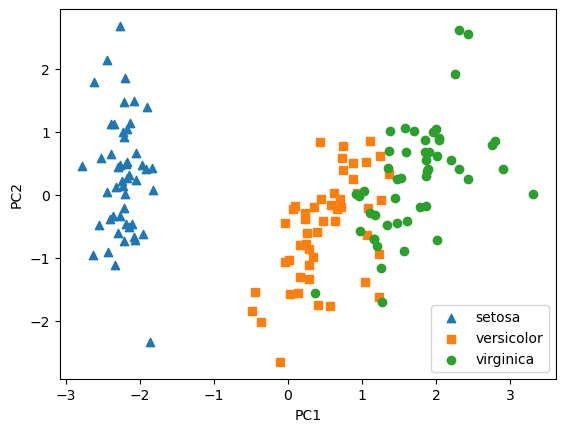

In [6]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['PC1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
plt.legend()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [7]:
irisDF[irisDF['target'] == 0].mean()

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
target          0.000
dtype: float64

In [8]:
irisDF[irisDF['target'] == 1].mean()

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
target          1.000
dtype: float64

In [9]:
irisDF[irisDF['target'] == 2].mean()

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
target          2.000
dtype: float64

In [10]:
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

1.0

[Text(0.5, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(0.384615384

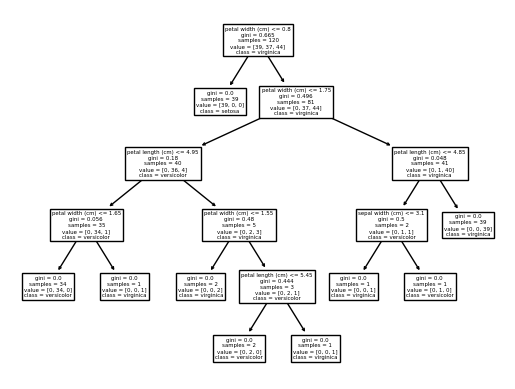

In [15]:
from sklearn.tree import plot_tree

plot_tree(dt_clf, class_names=list(iris.target_names), feature_names=iris.feature_names)

In [51]:
pca = PCA(n_components = 2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

X = iris_pca
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=0)

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

1.0

In [52]:
iris_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

[Text(0.5357142857142857, 0.95, 'PC1 <= -1.153\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(0.4642857142857143, 0.85, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.6071428571428571, 0.85, 'PC1 <= 1.251\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(0.35714285714285715, 0.75, 'PC1 <= 0.9\ngini = 0.273\nsamples = 43\nvalue = [0, 36, 7]\nclass = versicolor'),
 Text(0.21428571428571427, 0.65, 'PC2 <= -1.553\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]\nclass = versicolor'),
 Text(0.14285714285714285, 0.55, 'PC2 <= -1.562\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]\nclass = versicolor'),
 Text(0.07142857142857142, 0.45, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = versicolor'),
 Text(0.21428571428571427, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.2857142857142857, 0.55, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]\nclass = versicolor'),
 Text(0.5, 0.6

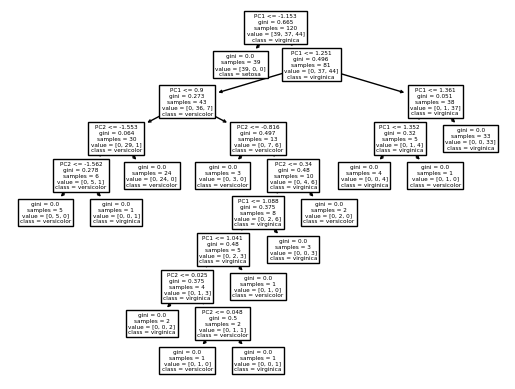

In [18]:
plot_tree(dt_clf, class_names=list(iris.target_names), feature_names=['PC1', 'PC2'])

In [22]:
pca = PCA(n_components = None)
pca.fit(iris_scaled)

PCA()

In [23]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

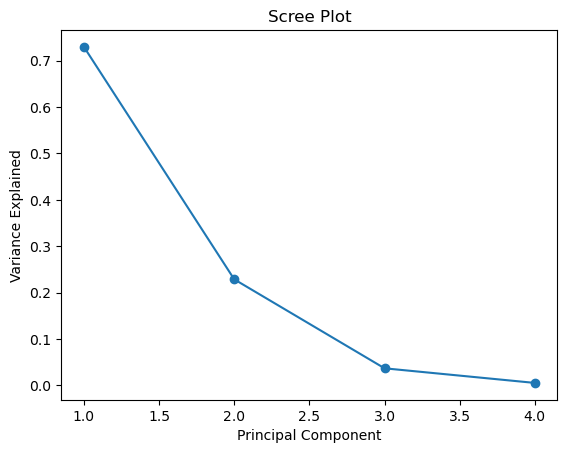

In [24]:
import numpy as np
pca = PCA(n_components = 4) # 피처 개수만큼
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [25]:
ratio = pca.explained_variance_ratio_

In [28]:
total_v = 0
for i, v in enumerate(ratio):
    total_v += v
    print(i+1, total_v)

1 0.729624454132999
2 0.9581320720000165
3 0.9948212908928452
4 1.0


In [47]:
credit = pd.read_csv('data/ml/creditcard.csv')
credit.shape

(284807, 31)

In [36]:
credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [37]:
credit = credit.drop(['Time', 'Class'], axis = 1)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
credit['Amount'] = scaler.fit_transform(credit[['Amount']])

In [40]:
pca = PCA(n_components=None)
pca.fit(credit)

PCA()

In [42]:
ratio = pca.explained_variance_ratio_

total_v = 0
for i, v in enumerate(ratio):
    total_v += v
    print(i+1, total_v)

1 0.12417221700240605
2 0.2234664136837869
3 0.2973412830873644
4 0.36264736465276454
5 0.4254690363969985
6 0.48212326094312163
7 0.5329892533251949
8 0.5780535107154551
9 0.6161370383567827
10 0.6536745119737088
11 0.6865076131461226
12 0.7179734567799171
13 0.7491910233892555
14 0.7781789855294429
15 0.8045818652967325
16 0.8287796566454423
17 0.8515180569787019
18 0.8738122549839409
19 0.8954317233369076
20 0.9161341349576937
21 0.9332443618057616
22 0.9498744159820196
23 0.9623690341821324
24 0.9739290143622841
25 0.9825358922680543
26 0.9898644733321832
27 0.9950190012897948
28 0.9984559663142905
29 1.0


In [43]:
pca = PCA(n_components=2)
credit_pca = pca.fit_transform(credit)

In [48]:
credit_df = pd.DataFrame(credit_pca, columns = ['PC1', 'PC2'])
credit_df['Class'] = credit['Class']

<Axes: xlabel='PC1', ylabel='PC2'>

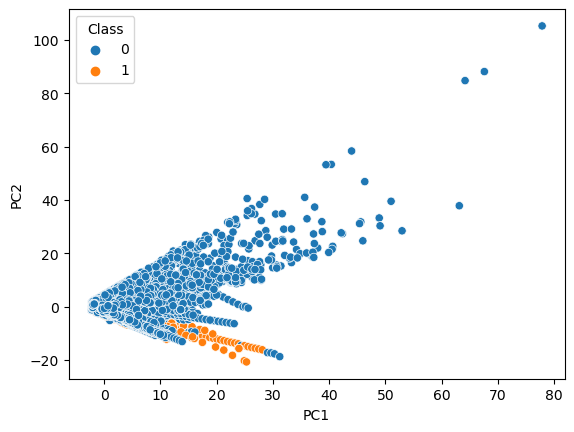

In [49]:
import seaborn as sns

sns.scatterplot(credit_df, x = 'PC1', y= 'PC2', hue='Class')

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) 
iris_lda = lda.transform(iris_scaled)


print(lda.explained_variance_ratio_)


[0.9912126 0.0087874]


In [55]:
lda_columns=['lda1','lda2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target']=iris.target
irisDF_lda.head()

,lda1,lda2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


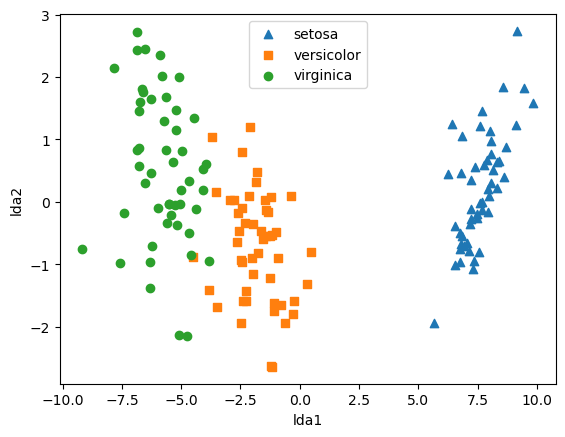

In [56]:
markers=['^', 's', 'o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('lda1')
plt.ylabel('lda2')
plt.show()


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

pca_X = irisDF_pca[['PC1', 'PC2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96
PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [60]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

pca_X = irisDF_lda[['lda1']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('LDA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('LDA 변환 데이터 평균 정확도:', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96
LDA 변환 데이터 교차 검증 개별 정확도: [0.98 0.9  0.94]
LDA 변환 데이터 평균 정확도: 0.94


In [62]:
credit = credit.drop('Time', axis = 1)

In [64]:
scaler = StandardScaler()
credit['Amount'] = scaler.fit_transform(credit[['Amount']])

In [67]:
credit_X.shape

(284807, 29)

In [74]:
credit_X = credit.iloc[:, :-1]
credit_y = credit.iloc[:, -1]

lda = LinearDiscriminantAnalysis(n_components=1)
# components의 개수는 피쳐의 전체 개수랑 
# (y의 범주의 개수 - 1)이랑 둘중 작은 값보다 커질수 없다
lda.fit(credit_X, credit_y)
credit_lda = lda.transform(credit_X)
LinearDiscriminantAnalysis()
credit_df = pd.DataFrame(credit_lda, columns = ['lda1'])
credit_df['Class'] = credit_y
credit_df

,lda1,Class
0,0.041840,0
1,-0.006130,0
2,0.071695,0
3,-0.001237,0
4,-0.006277,0
...,...,...
284802,-1.642072,0
284803,-0.040233,0
284804,0.116645,0
284805,-0.129233,0


<Axes: xlabel='Class', ylabel='lda1'>

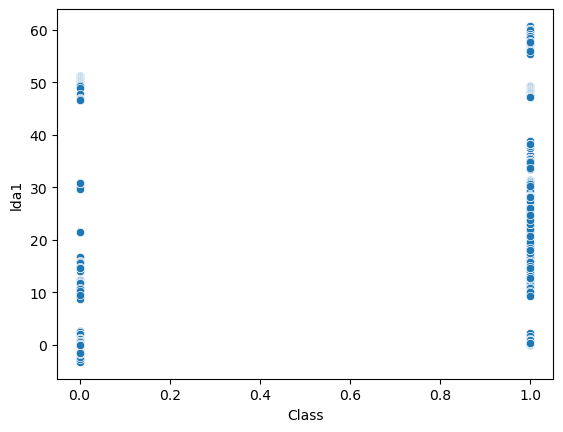

In [75]:
import seaborn as sns

sns.scatterplot(credit_df, x = 'Class', y = 'lda1')

In [76]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)
tsvd_columns=['tsvd1','tsvd2']
irisDF_tsvd = pd.DataFrame(iris_tsvd, columns = tsvd_columns)
irisDF_tsvd['target']=iris.target
irisDF_tsvd.head()

,tsvd1,tsvd2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [77]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

tsvd_X = irisDF_tsvd[['tsvd1','tsvd2']]
scores_tsvd = cross_val_score(rcf, tsvd_X, iris.target, scoring='accuracy', cv=3 )
print('TSVD 변환 데이터 교차 검증 개별 정확도:',scores_tsvd)
print('TSVD 변환 데이터 평균 정확도:', np.mean(scores_tsvd))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96
TSVD 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
TSVD 변환 데이터 평균 정확도: 0.88


<Axes: xlabel='tsvd1', ylabel='tsvd2'>

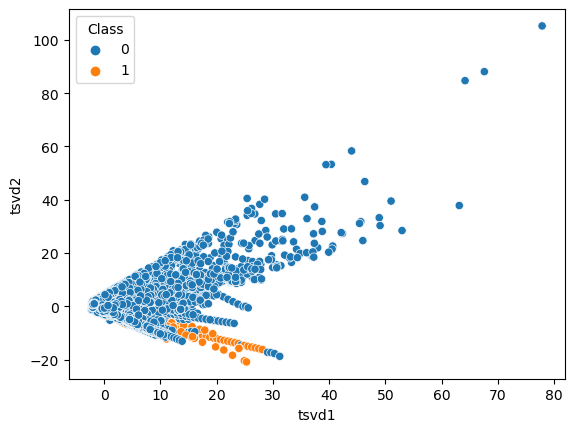

In [79]:
tsvd = TruncatedSVD(n_components=2)
credit_tsvd = tsvd.fit_transform(credit.iloc[:, :-1])

import seaborn as sns
credit_df = pd.DataFrame(credit_tsvd, columns = ['tsvd1', 'tsvd2'])
credit_df['Class'] = credit['Class']
sns.scatterplot(credit_df, x = 'tsvd1', y= 'tsvd2', hue='Class')

In [80]:
from sklearn.decomposition import NMF
nmf = NMF(n_components= 2)
nmf.fit(iris.data)
iris_nmf = nmf.transform(iris.data)
nmf_columns=['nmf1','nmf2']
irisDF_nmf = pd.DataFrame(iris_nmf, columns = nmf_columns)
irisDF_nmf['target']=iris.target
irisDF_nmf.head()

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


,nmf1,nmf2,target
0,0.413500,0.104673,0
1,0.365449,0.140978,0
2,0.377800,0.101885,0
3,0.349981,0.148964,0
4,0.415896,0.095306,0


In [81]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

nmf_X = irisDF_nmf[['nmf1','nmf2']]
scores_nmf = cross_val_score(rcf, nmf_X, iris.target, scoring='accuracy', cv=3 )
print('NMF 변환 데이터 교차 검증 개별 정확도:',scores_nmf)
print('NMF 변환 데이터 평균 정확도:', np.mean(scores_nmf))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96
NMF 변환 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
NMF 변환 데이터 평균 정확도: 0.96


In [87]:
pca = PCA(n_components=None)
ct = ColumnTransformer([('scaler', scaler, num_col),
                        ('oh_enc', oh_enc, obj_col)])
X_train_scaled = ct.fit_transform(X_train)
pca.fit(X_train_scaled)
total_v = 0
for i, v in enumerate(pca.explained_variance_ratio_):
    total_v += v
    print(i + 1, total_v)

1 0.2514877463754332
2 0.4765783030034799
3 0.6664141088554398
4 0.7754485070226166
5 0.8431398385956667
6 0.8975054967946606
7 0.9506364151332495
8 1.0
9 1.0
10 1.0
11 1.0


In [88]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('data/ml/medical_cost.csv')
df

y = df.iloc[:, -1]
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state=0)

scaler = StandardScaler()
oh_enc = OneHotEncoder()

obj_col = X.dtypes[X.dtypes == 'object'].index
num_col = X.dtypes[X.dtypes != 'object'].index

ct = ColumnTransformer([('scaler', scaler, num_col),
                        ('oh_enc', oh_enc, obj_col)])

# 차원축소
pca = PCA()

poly = PolynomialFeatures(degree=2, include_bias=False)
pipe = Pipeline([('ct', ct), ('pca', pca), ('poly', poly), 
                 ('linear', LinearRegression())])



params = [{'poly__degree' : [2, 3, 4], 
          'linear' : [Ridge(), 
                      Lasso()],
          'linear__alpha' : [1, 0.1, 0.01, 10, 100],
          'pca__n_components' : [5, 7]
          },
          
          
          {'poly__degree' : [2, 3, 4], 
          'linear' : [LinearRegression()],
          'pca__n_components' : [5, 7]},
          
          {'poly__degree' : [1], 
          'linear' : [RandomForestRegressor()],
           'linear__max_depth' : [None, 3, 5, 7],
           'linear__min_samples_leaf' : [1, 3, 5],
          'pca__n_components' : [5, 7]}
]
grid = GridSearchCV(pipe, param_grid=params, 
                    scoring='neg_root_mean_squared_error', cv = 5, verbose=True)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.059e+09, tolerance: 1.061e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+08, tolerance: 1.036e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.057e+09, tolerance: 1.029e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.715e+09, tolerance: 1.032e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.136e+09, tolerance: 1.029e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.697e+09, tolerance: 1.032e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.774e+07, tolerance: 1.036e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e+07, tolerance: 1.029e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['age', 'bmi', 'children'], dtype='object')),
                                                                        ('oh_enc',
                                                                         OneHotEncoder(),
                                                                         Index(['sex', 'smoker', 'region'], dtype='object'))])),
                                       ('pca', PCA()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('linear', LinearRegression())]),
             param_grid=[{'linear'...
                          'pca__n_components': [5, 7],
                          'poly__degree': [2, 3, 4]},
                         {'linear': [LinearRegression()],
                          'pca__n_components': [5, 7],
                          'poly__degree': [2, 3, 4]},
                         {'linear': [RandomForestRegressor(max_depth=7,
                                                           min_samples_leaf=3)],
                          'linear__max_depth': [None, 3, 5, 7],
                          'linear__min_samples_leaf': [1, 3, 5],
                          'pca__n_components': [5, 7], 'poly__degree': [1]}],
             scoring='neg_root_mean_squared_error', verbose=True)

In [89]:
grid.best_params_

{'linear': RandomForestRegressor(max_depth=7, min_samples_leaf=3),
 'linear__max_depth': 7,
 'linear__min_samples_leaf': 3,
 'pca__n_components': 5,
 'poly__degree': 1}

In [90]:
grid.best_score_

-5119.689502402622

In [91]:
pred = grid.predict(X_test)

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, pred))

4992.34028816348

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns = columns)

In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=500)
kmeans.fit(irisDF)

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=3)

In [94]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [107]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [95]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [102]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled = scaler.fit_transform(irisDF.iloc[:,:4])
centers_scaled = scaler.transform(kmeans.cluster_centers_)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled)
centers = pca.transform(centers_scaled)
irisDF['PC1'] = pca_transformed[:,0]
irisDF['PC2'] = pca_transformed[:,1]

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [103]:
centers

array([[ 0.61240002, -0.60046767],
       [-2.22475316,  0.28892745],
       [ 1.9281278 ,  0.59954272]])

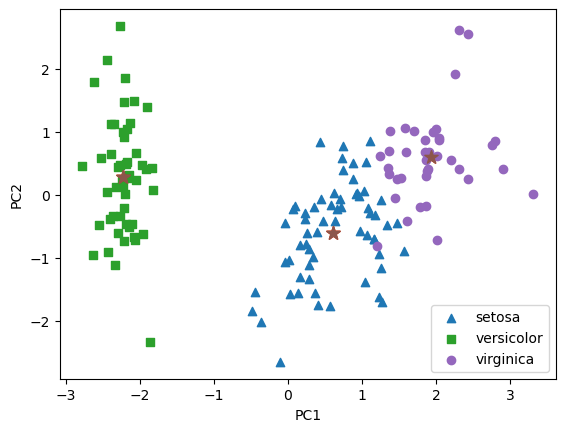

In [106]:
markers = ['^', 's', 'o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['cluster'] == i]['PC1']
    y_axis_data = irisDF[irisDF['cluster'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    plt.scatter(centers[:, 0], centers[:,1], marker = '*', s = 100)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [98]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [108]:
kmeans.inertia_

78.85144142614601

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

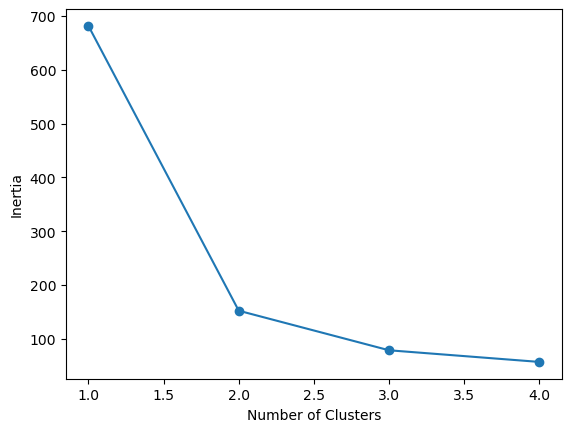

In [109]:
inertia = []
for i in range(1,5): # 1 ~ 4
    kmeans_plus = KMeans(n_clusters = i, max_iter=300, random_state=0)
    kmeans_plus.fit(irisDF.iloc[:,:4])
    inertia.append(kmeans_plus.inertia_)
plt.plot(range(1,5), inertia, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [112]:
kmeans = KMeans(n_clusters=2, max_iter=300, random_state=0)
kmeans.fit(irisDF.iloc[:,:4])
irisDF['cluster_2'] = kmeans.labels_

scaler = StandardScaler()
scaled = scaler.fit_transform(irisDF.iloc[:,:4])
centers_scaled = scaler.transform(kmeans.cluster_centers_)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled)
centers = pca.transform(centers_scaled)
irisDF['PC1'] = pca_transformed[:,0]
irisDF['PC2'] = pca_transformed[:,1]

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


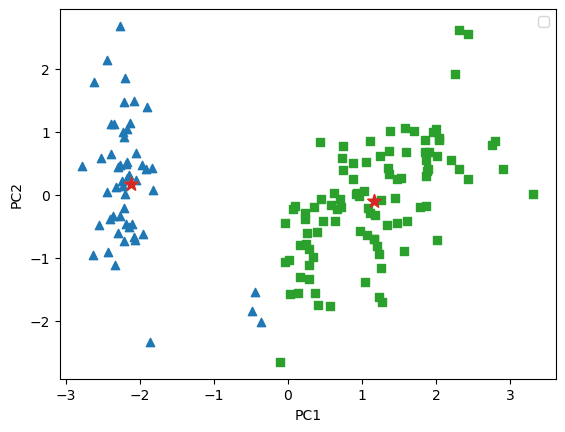

In [113]:
markers = ['^', 's']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['cluster_2'] == i]['PC1']
    y_axis_data = irisDF[irisDF['cluster_2'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker)
    plt.scatter(centers[:, 0], centers[:,1], marker = '*', s = 100)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [114]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
irisDF['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head()


silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,PC1,PC2,cluster_2,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027,0,0.852955
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134,0,0.815495
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908,0,0.829315
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395,0,0.805014
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835,0,0.849302


In [117]:
irisDF[irisDF['silhouette_coeff']< 0.5 ]

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,PC1,PC2,cluster_2,silhouette_coeff
50,7.0,3.2,4.7,1.4,1,0,1.101781,0.862972,1,0.026722
51,6.4,3.2,4.5,1.5,1,0,0.731337,0.594615,1,0.381186
52,6.9,3.1,4.9,1.5,1,2,1.240979,0.616298,1,0.053401
54,6.5,2.8,4.6,1.5,1,0,1.075475,-0.208421,1,0.368853
56,6.3,3.3,4.7,1.6,1,0,0.746530,0.773019,1,0.282326
57,4.9,2.4,3.3,1.0,1,0,-0.487323,-1.852429,0,0.265254
58,6.6,2.9,4.6,1.3,1,0,0.927902,0.032226,1,0.344192
60,5.0,2.0,3.5,1.0,1,0,-0.110196,-2.654073,1,0.374787
63,6.1,2.9,4.7,1.4,1,0,0.719562,-0.186225,1,0.482167
65,6.7,3.1,4.4,1.4,1,0,0.875407,0.509064,1,0.324593


In [118]:
score_samples = silhouette_samples(iris.data, irisDF['cluster_2'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
irisDF['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster_2'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head()


silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.681


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,PC1,PC2,cluster_2,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027,0,0.852225
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134,0,0.826916
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908,0,0.835426
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395,0,0.819249
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835,0,0.848731


In [119]:
from sklearn.cluster import MeanShift
meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(irisDF.iloc[:,:4])
print('클러스터 개수 :', len(np.unique(cluster_labels)))

클러스터 개수 : 4


In [121]:
irisDF['meanshift'] = cluster_labels

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


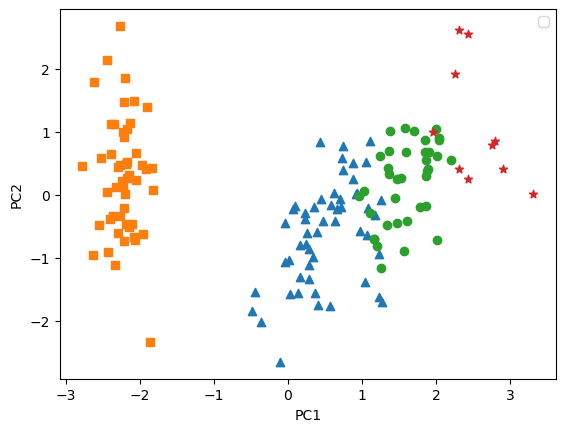

In [122]:
markers = ['^', 's', 'o', '*']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['meanshift'] == i]['PC1']
    y_axis_data = irisDF[irisDF['meanshift'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [123]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(irisDF.iloc[:,:4])
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.202


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


클러스터 개수 : 2


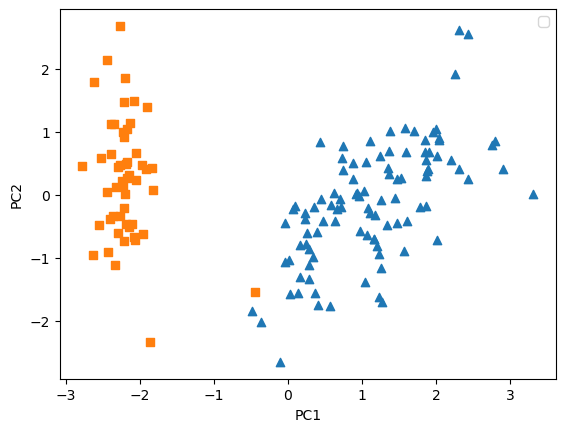

In [125]:
meanshift = MeanShift(bandwidth = bandwidth)
cluster_labels = meanshift.fit_predict(irisDF.iloc[:,:4])
print('클러스터 개수 :', len(np.unique(cluster_labels)))
irisDF['meanshift'] = cluster_labels

markers = ['^', 's']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['meanshift'] == i]['PC1']
    y_axis_data = irisDF[irisDF['meanshift'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [134]:
meanshift.cluster_centers_

array([[6.21142857, 2.89285714, 4.85285714, 1.67285714],
       [5.01632653, 3.45102041, 1.46530612, 0.24489796]])

In [127]:
average_score = silhouette_score(iris.data, irisDF['meanshift'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score:0.686


In [128]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3, random_state = 0)
gmm.fit(irisDF.iloc[:,:4])
gmm_labels = gmm.predict(irisDF.iloc[:,:4])
irisDF['gmm'] = gmm_labels
print(gmm_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


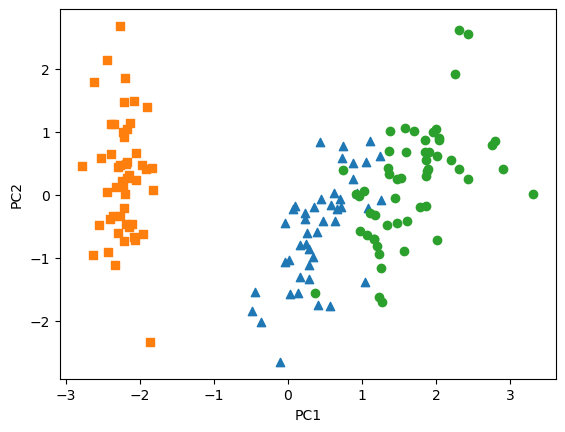

In [131]:
markers = ['^', 's', 'o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['gmm'] == i]['PC1']
    y_axis_data = irisDF[irisDF['gmm'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [133]:
gmm.means_

array([[5.9170732 , 2.77804839, 4.20540364, 1.29848217],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.54639415, 2.94946365, 5.48364578, 1.98726565]])

In [136]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns = columns)
irisDF['target'] = iris.target

In [159]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples = 8)

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

dbscan_labels = dbscan.fit_predict(iris_scaled)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                45
        -1                 5
1        1                40
        -1                10
2        1                33
        -1                17
Name: count, dtype: int64


In [160]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled = scaler.fit_transform(irisDF.iloc[:,:4])
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled)
irisDF['PC1'] = pca_transformed[:,0]
irisDF['PC2'] = pca_transformed[:,1]

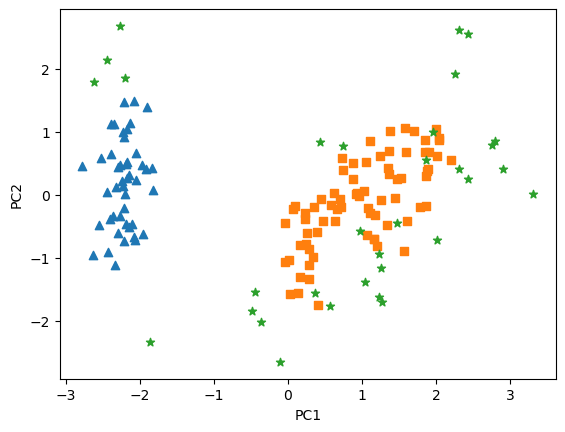

In [161]:
markers = ['^', 's']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['dbscan_cluster'] == i]['PC1']
    y_axis_data = irisDF[irisDF['dbscan_cluster'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker)
# 노이즈 표시
x_axis_data = irisDF[irisDF['dbscan_cluster'] == -1]['PC1']
y_axis_data = irisDF[irisDF['dbscan_cluster'] == -1]['PC2']
plt.scatter(x_axis_data, y_axis_data, marker = '*')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [163]:
credit = pd.read_csv('data/ml/creditcard.csv')
credit = credit.drop('Time', axis = 1)

In [164]:
X = credit.iloc[:, :-1]
y = credit.iloc[:, -1]

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, 
                                                    random_state= 0 )
print(X_train.shape)

(142403, 29)


In [168]:
from sklearn.metrics import accuracy_score

In [169]:
%%time
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
accuracy_score(y_test, pred)

CPU times: total: 3min
Wall time: 3min


0.9994663071262043

In [172]:
from sklearn.decomposition import PCA, TruncatedSVD

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
tsvd = TruncatedSVD(n_components=3)
X_train_tsvd = tsvd.fit_transform(X_train)
X_test_tsvd = tsvd.transform(X_test)

In [174]:
%%time
rf_clf.fit(X_train_pca, y_train)

pred2 = rf_clf.predict(X_test_pca)
accuracy_score(y_test, pred2)

CPU times: total: 35.6 s
Wall time: 35.6 s


0.9986095896182692

In [175]:
%%time
rf_clf.fit(X_train_tsvd, y_train)

pred3 = rf_clf.predict(X_test_tsvd)
accuracy_score(y_test, pred3)

CPU times: total: 36.4 s
Wall time: 36.5 s


0.9985885227943035

In [176]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[142151,     10],
       [    66,    177]], dtype=int64)

In [177]:
from sklearn.metrics import f1_score
print(f1_score(y_test, pred))
print(f1_score(y_test, pred2))
print(f1_score(y_test, pred3))

0.8232558139534885
0.4107142857142857
0.3853211009174311


In [178]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
%%time
rf_clf.fit(X_train_pca, y_train)

In [180]:
pred4 = rf_clf.predict(X_test_pca)
accuracy_score(y_test, pred4)

0.9994803516755147

In [181]:
print(f1_score(y_test, pred4))

0.827906976744186


In [183]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [186]:
df_y = y.to_frame('Y')
df_y['cluster'] = kmeans.labels_

In [188]:
df_y.groupby(['Y', 'cluster']).size()

Y  cluster
0  0          279106
   1            5209
1  0             474
   1              18
dtype: int64